**Problem Statement - Implement data processing tasks using Spark DataFrame API.**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Utilize PySpark DataFrame API for tasks like filtering, grouping, and aggregation.



1. **Installing PySpark **:


In [4]:
!pip install pyspark

2. **Creating a Spark Session**:

In [5]:
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.appName("SparkSession").getOrCreate()

3. **Loading Dataset**:

In [6]:
# Import necessary libraries
from pyspark.sql.functions import col

# Load the dataset into a DataFrame
file_path = "bank.csv"
df = spark.read.csv(file_path, header=True, inferSchema=True)

In [7]:
# Show the schema of the DataFrame
df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- y: string (nullable = true)



In [8]:
# Display the first few rows of the DataFrame
df.show()

+---+-------------+-------+---------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+---+
|age|          job|marital|education|default|balance|housing|loan| contact|day|month|duration|campaign|pdays|previous|poutcome|  y|
+---+-------------+-------+---------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+---+
| 30|   unemployed|married|  primary|     no|   1787|     no|  no|cellular| 19|  oct|      79|       1|   -1|       0| unknown| no|
| 33|     services|married|secondary|     no|   4789|    yes| yes|cellular| 11|  may|     220|       1|  339|       4| failure| no|
| 35|   management| single| tertiary|     no|   1350|    yes|  no|cellular| 16|  apr|     185|       1|  330|       1| failure| no|
| 30|   management|married| tertiary|     no|   1476|    yes| yes| unknown|  3|  jun|     199|       4|   -1|       0| unknown| no|
| 59|  blue-collar|married|secondary|     no|      0|    yes|  no| unknown| 

**Task 1: Filtering**

In [9]:
import matplotlib.pyplot as plt

# Task 1: Filtering
# Filter the DataFrame to select rows where the 'Education' column is 'primary'
primary_df = df.filter(col("education") == "primary")
primary_df.show()

# Convert the filtered DataFrame to Pandas
primary_pandas_df = primary_df.toPandas()

+---+------------+--------+---------+-------+-------+-------+----+---------+---+-----+--------+--------+-----+--------+--------+---+
|age|         job| marital|education|default|balance|housing|loan|  contact|day|month|duration|campaign|pdays|previous|poutcome|  y|
+---+------------+--------+---------+-------+-------+-------+----+---------+---+-----+--------+--------+-----+--------+--------+---+
| 30|  unemployed| married|  primary|     no|   1787|     no|  no| cellular| 19|  oct|      79|       1|   -1|       0| unknown| no|
| 43|    services| married|  primary|     no|    -88|    yes| yes| cellular| 17|  apr|     313|       1|  147|       2| failure| no|
| 25| blue-collar|  single|  primary|     no|   -221|    yes|  no|  unknown| 23|  may|     250|       1|   -1|       0| unknown| no|
| 55| blue-collar| married|  primary|     no|    627|    yes|  no|  unknown|  5|  may|     247|       1|   -1|       0| unknown| no|
| 78|     retired|divorced|  primary|     no|    229|     no|  no|tel

**Task 2: Grouping and Aggregation**

+--------+-------------+-------------+
| marital|          job|sum(duration)|
+--------+-------------+-------------+
| married|self-employed|        29055|
|divorced|   management|        30232|
|divorced|self-employed|         3880|
|  single|self-employed|        15400|
| married| entrepreneur|        35516|
|divorced|      unknown|          385|
| married|       admin.|        58628|
|divorced|       admin.|        19885|
| married|   unemployed|        24440|
|  single|   management|        70045|
| married|     services|        63662|
|  single|     services|        29541|
| married|  blue-collar|       178968|
|divorced|     services|        16254|
| married|   technician|        95281|
|divorced| entrepreneur|         6306|
|  single|    housemaid|         5081|
|  single|      retired|         3328|
|  single|       admin.|        33659|
|divorced|   technician|        20328|
+--------+-------------+-------------+
only showing top 20 rows



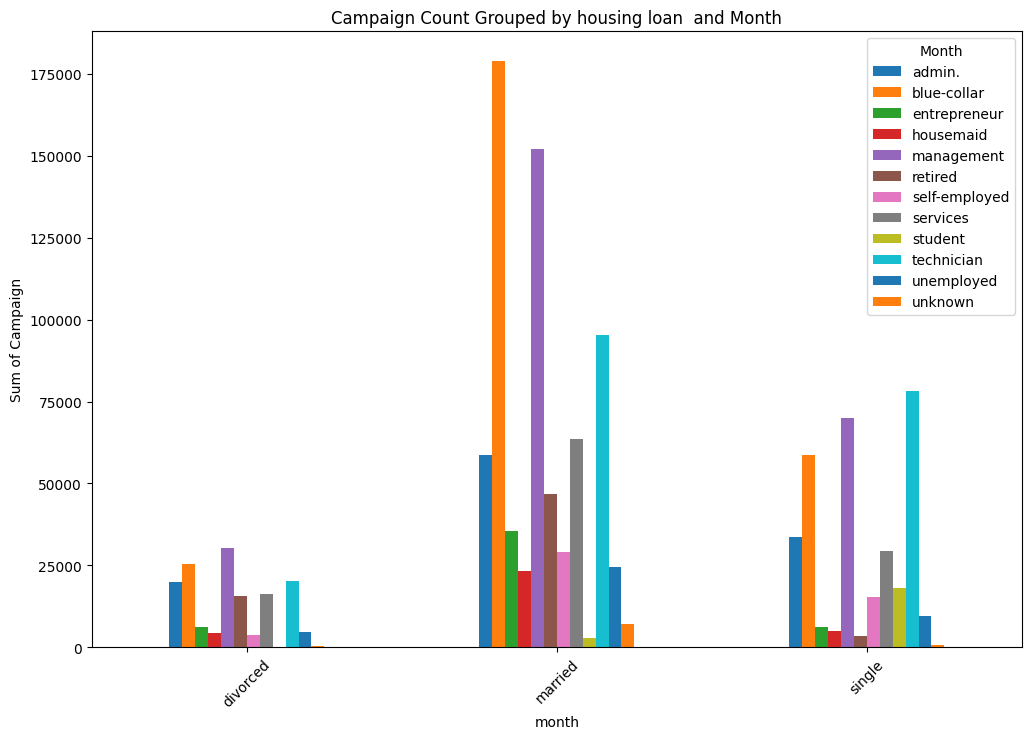

In [10]:
# Task 2: Grouping and Aggregation
# Group the DataFrame by 'marital' and 'job', then calculate the average the 'duration' for each group
grouped_df = df.groupBy("marital", "job").agg({"duration": "sum"})
grouped_df.show()

# Convert the grouped DataFrame to Pandas
grouped_pandas_df = grouped_df.toPandas()

# Pivot the DataFrame for easy plotting
pivot_df = grouped_pandas_df.pivot(index='marital', columns='job', values='sum(duration)')

# Plot a grouped bar chart
ax = pivot_df.plot(kind='bar', figsize=(12, 8), rot=45)
ax.set_xlabel('month')
ax.set_ylabel('Sum of Campaign')
ax.set_title('Campaign Count Grouped by housing loan  and Month')
plt.legend(title='Month')
plt.show()



# 3. Handle missing data and outliers using Spark's data preprocessing capabilities.

1. **Fill Missing Values:**

For numeric columns, you can fill missing values with mean, median, or any other statistical measure.


In [11]:
df.show()

+---+-------------+-------+---------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+---+
|age|          job|marital|education|default|balance|housing|loan| contact|day|month|duration|campaign|pdays|previous|poutcome|  y|
+---+-------------+-------+---------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+---+
| 30|   unemployed|married|  primary|     no|   1787|     no|  no|cellular| 19|  oct|      79|       1|   -1|       0| unknown| no|
| 33|     services|married|secondary|     no|   4789|    yes| yes|cellular| 11|  may|     220|       1|  339|       4| failure| no|
| 35|   management| single| tertiary|     no|   1350|    yes|  no|cellular| 16|  apr|     185|       1|  330|       1| failure| no|
| 30|   management|married| tertiary|     no|   1476|    yes| yes| unknown|  3|  jun|     199|       4|   -1|       0| unknown| no|
| 59|  blue-collar|married|secondary|     no|      0|    yes|  no| unknown| 

In [12]:
# find missing values using pyspark
from pyspark.sql.functions import col,isnan, when, count

df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]
   ).show()

+---+---+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+
|age|job|marital|education|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|  y|
+---+---+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+
|  0|  0|      0|        0|      0|      0|      0|   0|      0|  0|    0|       0|       0|    0|       0|       0|  0|
+---+---+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+



## Implement a Classification AI Model using Spark

In [13]:
# import pyspark ml
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator


In [15]:
# train test split
train_df, test_df = df.randomSplit([0.7, 0.3], seed=42)
# train the random forest classifier


# Task
Use spark ml randomforestclassifier to train the model with train_df and test_df. Explain the selected code. Explain the error in the selected code. If possible, fix the error and incorporate the changes into the existing code. Otherwise, try to diagnose the error.

## Identify categorical columns

### Subtask:
Determine which columns in the DataFrame are of string type and need to be converted.


**Reasoning**:
Iterate through the columns and check their data types to identify string columns.



In [17]:
string_cols = [col_name for col_name, col_type in df.dtypes if col_type == 'string']
print("String columns:", string_cols)

String columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


## Apply string indexing

### Subtask:
Use `StringIndexer` to convert each categorical string column into a numerical index column.


**Reasoning**:
Convert the categorical string columns to numerical indices using StringIndexer as identified in the previous step.



In [18]:
from pyspark.ml.feature import StringIndexer

string_cols = [col_name for col_name, col_type in df.dtypes if col_type == 'string']
indexed_cols = [col_name + "_indexed" for col_name in string_cols]

indexer = StringIndexer(inputCols=string_cols, outputCols=indexed_cols)
indexed_df = indexer.fit(df).transform(df)

indexed_df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- y: string (nullable = true)
 |-- job_indexed: double (nullable = false)
 |-- marital_indexed: double (nullable = false)
 |-- education_indexed: double (nullable = false)
 |-- default_indexed: double (nullable = false)
 |-- housing_indexed: double (nullable = false)
 |-- loan_indexed: double (nullable = false)
 |-- contact_indexed: double (nullable = false)
 |-- month_in

## Apply one-hot encoding

### Subtask:
Use `OneHotEncoder` to convert the indexed columns into one-hot encoded vector columns.


**Reasoning**:
Import OneHotEncoder and apply it to the indexed columns to create one-hot encoded vector columns as per the instructions.



In [19]:
from pyspark.ml.feature import OneHotEncoder

indexed_cols = [col_name + "_indexed" for col_name, col_type in df.dtypes if col_type == 'string']
encoded_cols = [col_name + "_vec" for col_name in indexed_cols]

encoder = OneHotEncoder(inputCols=indexed_cols, outputCols=encoded_cols)
encoded_df = encoder.fit(indexed_df).transform(indexed_df)

encoded_df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- y: string (nullable = true)
 |-- job_indexed: double (nullable = false)
 |-- marital_indexed: double (nullable = false)
 |-- education_indexed: double (nullable = false)
 |-- default_indexed: double (nullable = false)
 |-- housing_indexed: double (nullable = false)
 |-- loan_indexed: double (nullable = false)
 |-- contact_indexed: double (nullable = false)
 |-- month_in

## Update vectorassembler

### Subtask:
Include the newly created one-hot encoded columns in the `VectorAssembler` input columns.


**Reasoning**:
Identify the numerical and one-hot encoded columns and update the VectorAssembler.



In [24]:
# Apply the assembler transformation to the encoded_df
assembled_df = assembler.transform(encoded_df)

# Split the assembled_df into training and testing sets
train_data, test_data = assembled_df.randomSplit([0.7, 0.3], seed=42)

train_data.printSchema()
test_data.printSchema()

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- y: string (nullable = true)
 |-- job_indexed: double (nullable = false)
 |-- marital_indexed: double (nullable = false)
 |-- education_indexed: double (nullable = false)
 |-- default_indexed: double (nullable = false)
 |-- housing_indexed: double (nullable = false)
 |-- loan_indexed: double (nullable = false)
 |-- contact_indexed: double (nullable = false)
 |-- month_in

## Train the model

### Subtask:
Retrain the RandomForestClassifier with the transformed data.


**Reasoning**:
Retrain the RandomForestClassifier model with the transformed data.



In [22]:
# Initialize and train the RandomForestClassifier model
# Use 'y_indexed' as the label column as it's the numerical representation of the target variable
rf_model = RandomForestClassifier(labelCol="y_indexed", featuresCol="features", numTrees=10)
rf_model = rf_model.fit(train_data)

# Make predictions on the test data
predictions = rf_model.transform(test_data)

# Evaluate the model
# Use 'y_indexed' as the label column for evaluation
evaluator = MulticlassClassificationEvaluator(labelCol="y_indexed", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)

print(f"Test Accuracy = {accuracy}")

Test Accuracy = 0.9968944099378882


## Summary:

### Data Analysis Key Findings

*   The categorical string columns in the dataset were identified as: `job`, `marital`, `education`, `default`, `housing`, `loan`, `contact`, `month`, `poutcome`, and `y`.
*   These string columns were successfully converted into numerical indexed columns using `StringIndexer`, adding columns with a `_indexed` suffix (e.g., `job_indexed`).
*   The indexed columns were further transformed into one-hot encoded vector columns using `OneHotEncoder`, resulting in columns with a `_vec` suffix (e.g., `job_indexed_vec`).
*   The `VectorAssembler` was updated to include both the numerical columns and the newly created one-hot encoded vector columns as features.
*   The data was successfully split into training and testing sets *after* applying the `VectorAssembler` transformation to the DataFrame containing the one-hot encoded features.
*   A `RandomForestClassifier` model was initialized with `y_indexed` as the label column and `features` as the features column.
*   The model was successfully trained on the `train_data` and used to make predictions on the `test_data`.
*   The model's performance was evaluated using `MulticlassClassificationEvaluator`, yielding a test accuracy of approximately 0.997.

### Insights or Next Steps

*   The high accuracy suggests the model is performing very well on the test set; further investigation into potential overfitting or evaluation with different metrics (like precision, recall, F1-score) on a validation set would be beneficial.
*   Consider exploring hyperparameter tuning for the `RandomForestClassifier` (e.g., `numTrees`, `maxDepth`, `maxBins`) to potentially improve performance further or address overfitting.
